# Stage 09 — Homework Starter Notebook

In the lecture, we learned how to create engineered features. Now it’s your turn to apply those ideas to your own project data.

In [9]:
import pandas as pd
import numpy as np, matplotlib.pyplot as plt, seaborn as sns

df = pd.read_csv('../api_source-yfinance_symbol-TSLA_20250820-231717.csv')
df =df.rename(columns={'adj_close': 'price'})
df = df.drop(index=0).reset_index(drop=True)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df.head()

,date,price
0,2025-05-21,334.619995
1,2025-05-22,341.040009
2,2025-05-23,339.339996
3,2025-05-27,362.890015
4,2025-05-28,356.899994


## TODO: Implement at least 2 engineered features here

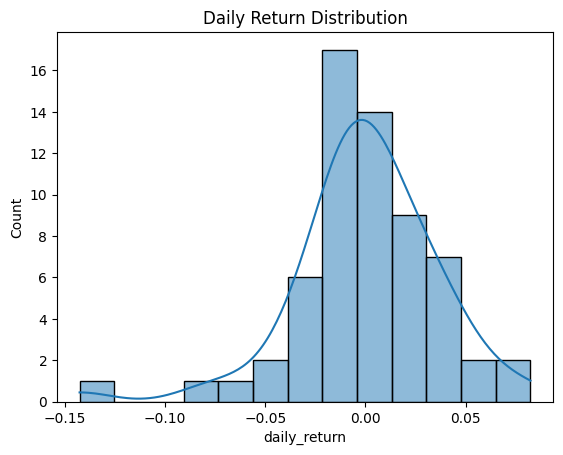

In [10]:
df['daily_return'] = df['price'].pct_change()
sns.histplot(df['daily_return'], kde=True)
plt.title('Daily Return Distribution')
plt.show()

### Rationale for Feature 1
This is helpful because in the stock market, we depends on the change of the price to make money, especailly the daily change if we do high-frequent trade. As a result, looking at the histogram of the daily return can help us to decide whether we should invest the Tesla stock or not.

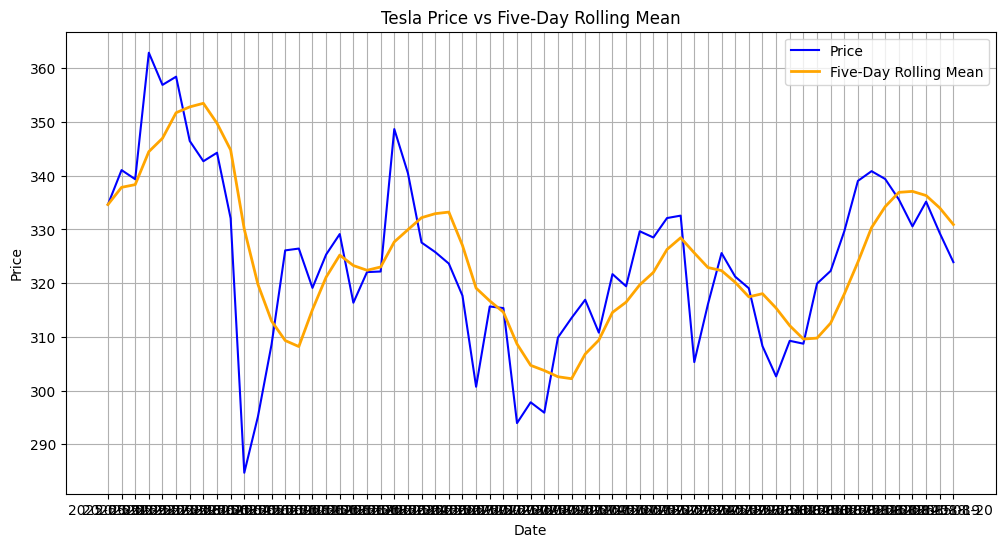

In [11]:
df['rolling_mean_5'] = df['price'].rolling(window=5, min_periods=1).mean()
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['price'], label='Price', color='blue')
plt.plot(df['date'], df['rolling_mean_5'], label='Five-Day Rolling Mean', color='orange', linewidth=2)
plt.title('Tesla Price vs Five-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

### Rationale for Feature 2
The five-day moving average price is helpful because it smooths out the short-term fluctuation but highlights the local trend. In the stock market, there are many daily noises, so it is important to reduce these noises and find out the real change of trend. As the graph shows, the five-day moving average price fluctuates less heavily than the daily price.